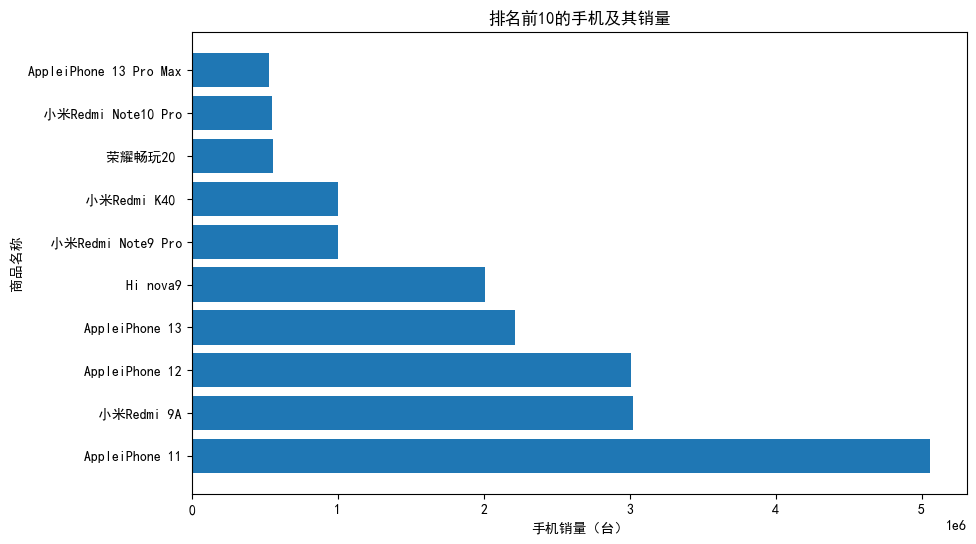

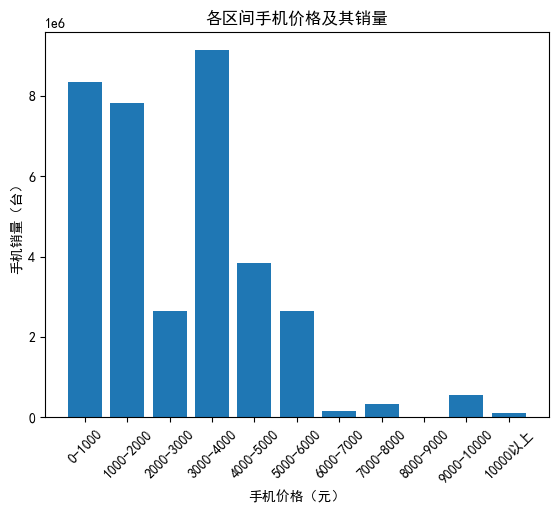

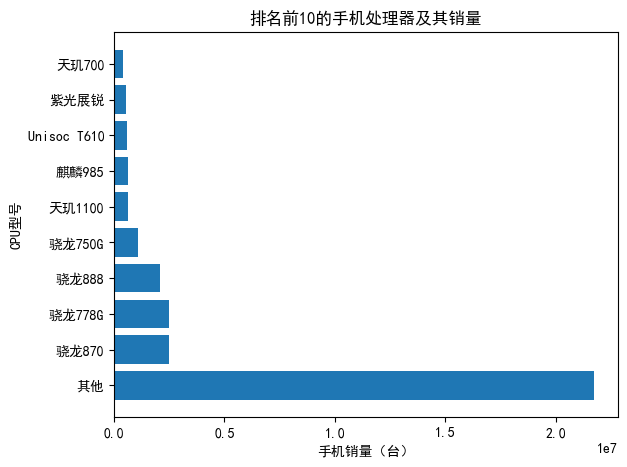

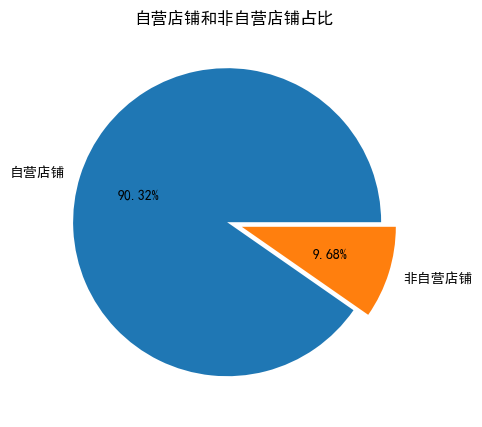

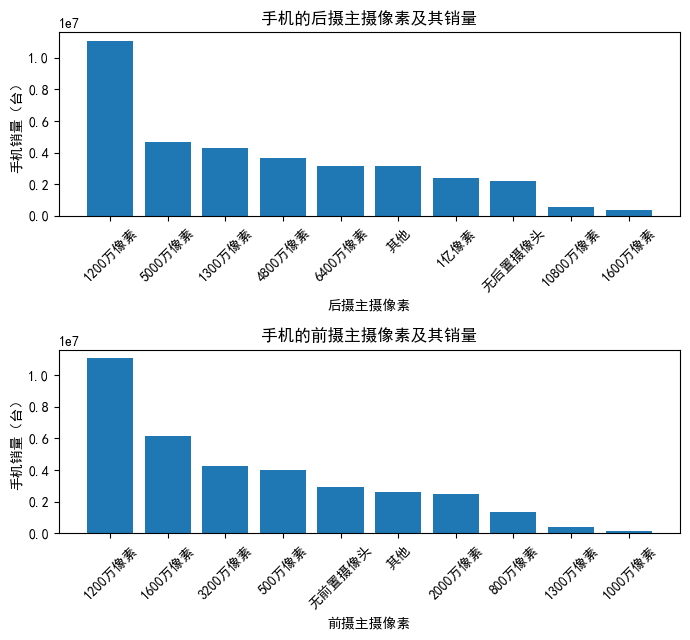

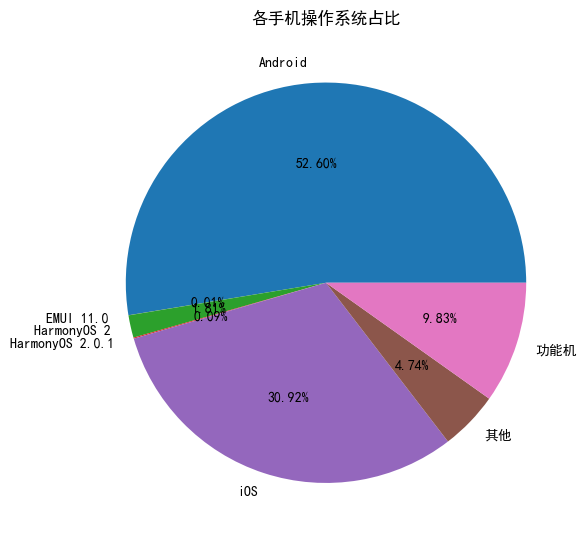

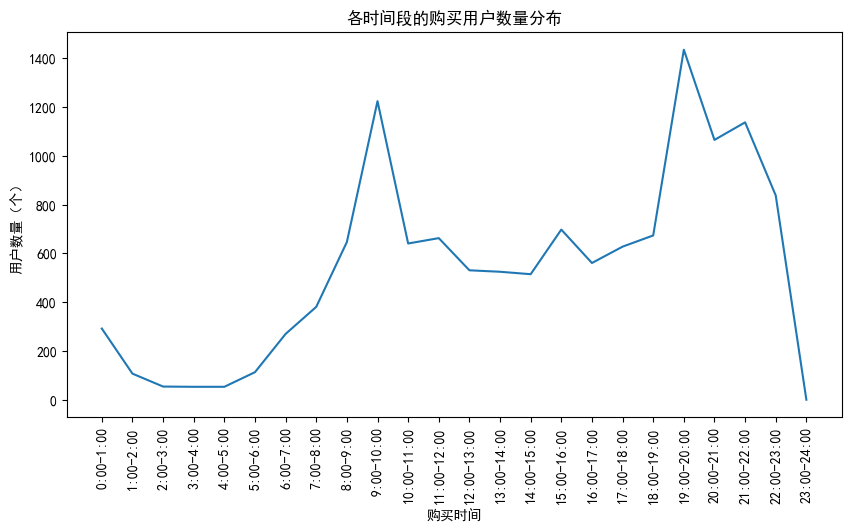

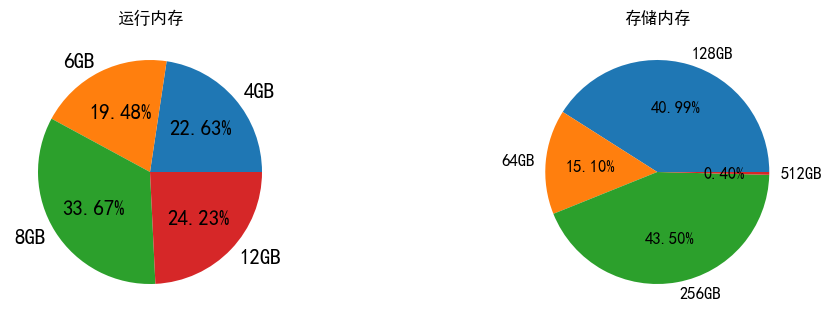

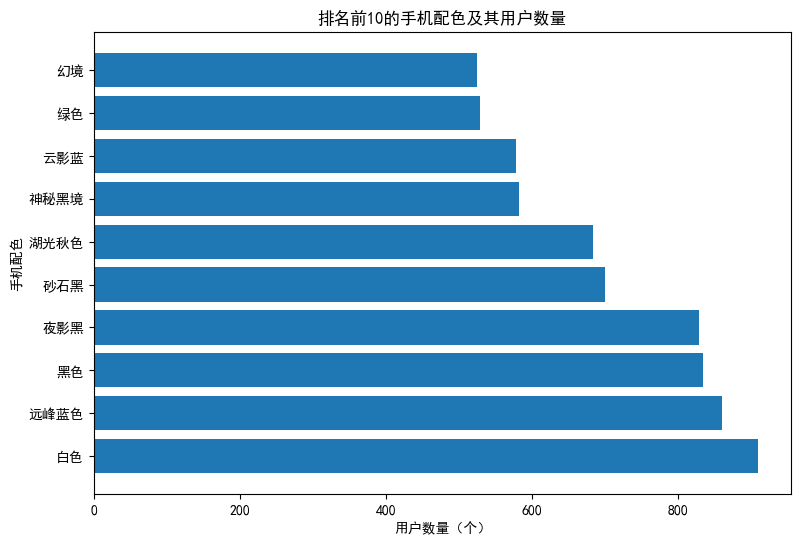

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.549 seconds.
Prefix dict has been built successfully.


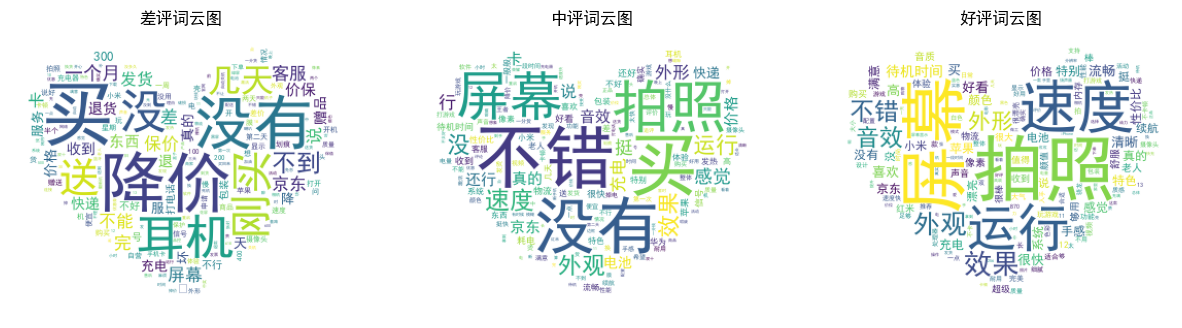

In [1]:
import pandas as pd; 
import matplotlib.pyplot as plt; import re
from wordcloud import WordCloud
import jieba; from tkinter import _flatten
%matplotlib inline

# 3.4 Data Visualization Analysis
# Read dtaa
all_sales_data = pd.read_csv('../tmp/处理后的手机销售数据.csv', encoding='gbk')
after_sales_data = pd.read_csv('../tmp/处理后的手机售后数据.csv', encoding='utf-8')
# all_sales_data = pd.read_csv('C:/datamine/tmp/处理后的手机销售数据.csv', encoding='gbk')
# after_sales_data = pd.read_csv('C:/datamine/tmp/处理后的手机售后数据.csv', encoding='utf-8')

# 3.4.1 Cellphone sales factor analysis
# 3.4.1.1 Hot-selling mobile phone
# Remove irrelevant characters from mobile phone sales; Convert Chinese unit measurements into concrete numerical values
all_sales_data['手机销量'] = [i.split('+')[0] if '+' in i else i for i in all_sales_data['商品评价量']]
all_sales_data['手机销量'] = [int(i.replace('万', '0000')) if '万' in i else int(i) for i in all_sales_data['手机销量']]
hot_data = all_sales_data[['商品名称', '手机销量']].groupby(by='商品名称').sum()
hot_data = hot_data.sort_values(by='手机销量', ascending=False).head(10)
# Draw a bar chart of the top 10 mobile phones and their sales
plt.rcParams['font.sans-serif'] = ['SimHei']  # Set Chinese Display
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
plt.xlabel('手机销量（台）')
plt.ylabel('商品名称')
plt.title('排名前10的手机及其销量')
plt.barh(hot_data.index, hot_data['手机销量'].values)
plt.show()



# 3.4.1.2 Cellphone price
price_data = all_sales_data[['手机价格', '手机销量']].groupby(by='手机价格').sum()
price_data = price_data.sort_values(by='手机价格', ascending=False)
price = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', 
         '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000以上']
price_data1 = pd.DataFrame(columns=['价格区间','手机销量'])
for i in range(0, 11000, 1000):
    n = int(i/1000)
    price_data2 = pd.DataFrame([])
    if n < 10 :
        price_data2['价格区间'] = [price[n]]
        price_data2['手机销量'] = [price_data.loc[((i < price_data.index) 
                                               & (price_data.index <= i + 1000)), '手机销量'].sum()]
    else:
        price_data2['价格区间'] = [price[n]]
        price_data2['手机销量'] = [price_data[i < price_data.index]['手机销量'].sum()]
    price_data1 = pd.concat([price_data1, price_data2], axis=0, ignore_index=True)
plt.figure(figsize=(6.5, 5))
plt.xticks(rotation=45)
plt.xlabel('手机价格（元）')
plt.ylabel('手机销量（台）')
plt.title('各区间手机价格及其销量')
plt.bar(price_data1['价格区间'], price_data1['手机销量'].values)
plt.show()



# 3.4.1.3 Cellphone processor
cpu_data = all_sales_data[['CPU型号', '手机销量']].groupby(by='CPU型号').sum()
cpu_data = cpu_data.sort_values(by='手机销量',ascending=False).head(10)
plt.figure(figsize=(6.5, 5))
plt.xlabel('手机销量（台）')
plt.ylabel('CPU型号')
plt.title('排名前10的手机处理器及其销量')
plt.barh(cpu_data.index, cpu_data['手机销量'].values)
plt.show()



# 3.4.1.4 Operating store
x =[]
for i in all_sales_data['店铺名称']:
    if '自营' in str(i) :
        x.append('自营店铺')
    else:
        x.append('非自营店铺')
all_sales_data['店铺类型'] = x
shop_data = all_sales_data[['店铺类型', '手机销量']].groupby(by='店铺类型').sum()
plt.figure(figsize=(6.5, 5))
plt.title('自营店铺和非自营店铺占比')
explode = [0.05, 0.05]
plt.pie(shop_data['手机销量'].values,explode=explode,
        labels=list(shop_data.index), autopct='%1.2f%%')
plt.show()



# 3.4.1.5 Pixel of cellphone

# Customize the fig_bar function to draw a bar chart of the front and back main pixels of the phone and their sales
def fig_bar(i):
    pixel_data = all_sales_data[[label[i], '手机销量']].groupby(by=label[i]).sum()
    pixel_data = pixel_data.sort_values(by='手机销量', ascending=False).head(10)
    plt.subplot(2, 1, i + 1)
    plt.xticks(rotation=45)
    plt.xlabel(label[i])
    plt.ylabel('手机销量（台）')
    plt.title('手机的' + label[i] + '及其销量')
    plt.bar(pixel_data.index, pixel_data['手机销量'].values)
    plt.tight_layout() # Set the default spacing
label = all_sales_data.columns[5:7]
plt.figure(figsize=(7, 6.5))
for i in range(2):
    fig_bar(i)
plt.show()



# 3.4.1.6 OS
sytem_data = pd.DataFrame(all_sales_data[['系统', '手机销量']].groupby(by='系统').sum())
sytem_data.index = [i.split('（')[0] for i in sytem_data.index]
label = list(sytem_data.index)
plt.figure(figsize=(6.5, 6.5))
plt.title('各手机操作系统占比')
plt.pie(sytem_data['手机销量'].values, labels=label, autopct='%1.2f%%')
plt.show()



# 3.4.2 User consumption habits analysis
# 3.4.2.1 Purchasing time
x2 = []
for i in after_sales_data['购买时间']:
    x2.append(re.split(' |:', i)[1])
# Convert x2 to a numeric type, handling errors  
x2 = pd.to_numeric(x2, errors='coerce') 
label = []
for i in range(24):
    label.append(f'{i}:00-{i + 1}:00')
buy_data = pd.cut(x2, bins=[i for i in range(25)], labels=label).value_counts()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.xlabel('购买时间')
plt.ylabel('用户数量（个）')
plt.title('各时间段的购买用户数量分布')
plt.plot(buy_data.index, buy_data.values)
plt.show()



# 3.4.2.2 Cellphone memory
# Check whether there is a + in the memory of the phone. 
#If no, it indicates that this part of data contains only running memory or storage memory and needs to be deleted
memory_first_split = list(filter(None, [i if '+' in i else "" for i in after_sales_data['手机内存']]))
# Delete irrelevant content from the phone's memory
memory_second_split = [i.split(' ')[1] if ' ' in i else i for i in memory_first_split]
memory_second_split = [i.replace('8+', '8GB+') for i in memory_second_split]

# A customized split_memory function that uses the + sign to separate the combined running memory from the storage memory
def split_memory(values):
    memory_type=pd.DataFrame([i.split('+')[values] if '+' in i else i for i in memory_second_split])
    return memory_type

# Run memory
memory_run = split_memory(0)
memory_run.columns = ['运行内存']
# Storage memory
memory_storage = split_memory(1)
memory_storage.columns = ['存储内存']


# The memory_statistics function is customized to calculate the proportion of running memory and storage memory
def memory_statistics(values1, values2, values3):
    memory = list(values2.drop_duplicates(keep='first'))
    memory_data={}
    for i in memory:
        memory_data[i]=len(values1[values2==i][values3])
    return memory_data
        
memory_run_count=memory_statistics(memory_run, memory_run['运行内存'], '运行内存')
memory_storage_count=memory_statistics(memory_storage, memory_storage['存储内存'], '存储内存')

# Customize the memory_picture function to draw a pie chart of the percentage of running memory and the percentage of stored memory
fig = plt.figure(figsize=(12, 8))
def memory_picture(position, value, tag, size, name):
    ax = fig.add_subplot(position)
    patch, l_text, p_text = ax.pie(value, labels=tag, autopct='%1.2f%%')
    for i,j in zip(l_text, p_text):
        i.set_size(size)
        j.set_size(size)
    ax.set_title(name)
    
# The first subgraph
ax1=memory_picture(221,memory_run_count.values(),memory_run_count.keys(), 15, '运行内存')
# The 2nd subgraph
ax2=memory_picture(222, memory_storage_count.values(), memory_storage_count.keys(), 12, '存储内存')
plt.show()



# 3.4.2.3 Cellphone color matching
colour_data = after_sales_data.groupby(by='手机配色').count()
colour_data = colour_data.sort_values(by='评论文本', ascending=False).head(10)
plt.figure(figsize=(9, 6))
plt.xlabel('用户数量（个）')
plt.ylabel('手机配色')
plt.title('排名前10的手机配色及其用户数量')
plt.barh(colour_data.index, colour_data['评论文本'].values)
plt.show()



# 3.4.3 Customer after-sales review analysis
# Custom draw_wc function to implement the operation of jieba word segmentation and stop word, 
#further process the comment text and reduce the noise as much as possible据
def draw_wc(data, i, p):
    #  word segmentation
    jieba.load_userdict('../data/手机词汇.txt')
    data_cut = data.apply(jieba.lcut)
    # remove stopped word
    with open('../data/stoplist.txt', 'r', encoding='utf-8') as f:
        stop = f.read().split()
    stop = stop + [' ', '\n', '\t', '\r', '手机']
    global data_after
    data_after = data_cut.apply(lambda x: [w for w in x if w not in stop])
    # Statistical word frequency
    num = pd.Series(_flatten(list(data_after))).value_counts()
    # Word cloud rendering
    # Background image reading

    pic = plt.imread('../data/aixin.jpg')
    # Set word cloud parameters
    wc = WordCloud(font_path='../data/simhei.ttf', mask=pic, background_color='white')
    wc.fit_words(num)
    # Display word cloud
    plt.subplot(1, 3, i+1)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(p + '词云图')

# Draw a cloud map of good, medium and poor comments
p = ['差评', '中评', '好评']
plt.figure(figsize = (15, 10))
for i in range(3):
    if i == 0 :
        # Word cloud map of poor comments
        ind1 = after_sales_data['用户评分'] == 1
        draw_wc(after_sales_data.loc[ind1, '评论文本'], i, p[i])
    elif i == 1:
        # Word cloud map of mediume comments
        ind2 = after_sales_data['用户评分'] == 2
        ind3 = after_sales_data['用户评分'] == 3
        draw_wc(after_sales_data.loc[ind2|ind3, '评论文本'], i, p[i])
    else :
        # Word cloud map of good comments
        ind4 = after_sales_data['用户评分'] == 4
        ind5 = after_sales_data['用户评分'] == 5
        draw_wc(after_sales_data.loc[ind4|ind5, '评论文本'], i, p[i])
plt.show()